In [2]:
import timm 
import torch

model = timm.create_model('resnet34')
x     = torch.randn(1, 3, 224, 224)
model(x).shape

C:\Users\Sven\anaconda3\envs\torch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([1, 1000])

In [4]:
import nibabel as nib
import SimpleITK as sitk

# load NIfTI file
nifti_file = nib.load('c:/users/sven/Documents/BEP/simplified_data\B01\MASKS\B01.nii.gz')







# get the data as a numpy array
nifti_data = np.uint8(nifti_file.get_fdata() * 255)

# print some information about the data
print(f"Data shape: {nifti_data.shape}")
print(f"Data type: {nifti_data.dtype}")

Data shape: (512, 512, 210)
Data type: uint8


In [40]:
nifti_file

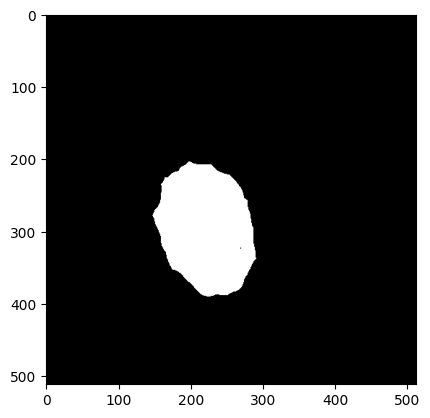

In [42]:
slice_z100 = nifti_data[:, :, 100]
plt.imshow(slice_z100, cmap='gray')

In [43]:
print(slice_z100)
np.set_printoptions(threshold=np.inf)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 

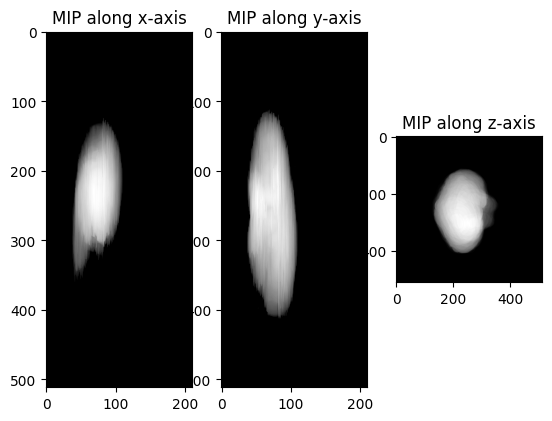

In [3]:
import numpy as np


img_data = nifti_file.get_fdata()

# Generate maximum intensity projections (MIPs) along the z-axis
z_mip = np.mean(img_data, axis=2)

# Generate MIPs along the y-axis
y_mip = np.mean(img_data, axis=1)

# Generate MIPs along the x-axis
x_mip = np.mean(img_data, axis=0)

# Show the MIPs using matplotlib or other plotting libraries
import matplotlib.pyplot as plt

plt.subplot(131)
plt.imshow(x_mip, cmap='gray')
plt.title('MIP along x-axis')

plt.subplot(132)
plt.imshow(y_mip, cmap='gray')
plt.title('MIP along y-axis')

plt.subplot(133)
plt.imshow(z_mip, cmap='gray')
plt.title('MIP along z-axis')

plt.show()

In [21]:
model = timm.create_model('resnet34', pretrained=True, in_chans=1)
model(img)

TypeError: conv2d() received an invalid combination of arguments - got (Image, Parameter, NoneType, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!Image!, !Parameter!, !NoneType!, !tuple!, !tuple!, !tuple!, int)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!Image!, !Parameter!, !NoneType!, !tuple!, !tuple!, !tuple!, int)


In [46]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import timm
from PIL import Image

# Define the ResNet model to use
model = timm.create_model('resnet18', pretrained=True, in_chans=1)

# Replace the last layer with a new layer that outputs the desired number of classes
num_classes = 2
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Define the image transformation pipeline
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # assuming the input image is in [0, 255] range
])

# Load the input image and apply the transformation pipeline
img = Image.fromarray(z_mip)
input_image = img.convert('L')  # convert to grayscale
input_tensor = transform(input_image).unsqueeze(0)  # unsqueeze to add a batch dimension

# Run the model inference on the input tensor
output = model(input_tensor)

# Get the predicted class label and probability
predicted_class = torch.argmax(output).item()
predicted_prob = torch.softmax(output, dim=1)[0][predicted_class].item()

# Print the predicted class and probability
print(f'Predicted class: {predicted_class}, probability: {predicted_prob:.3f}')

Predicted class: 0, probability: 0.589


In [41]:
image = sitk.ReadImage('c:/users/sven/Documents/BEP/simplified_data\B01\IMAGES\B01.nii.gz')
img_data = sitk.GetArrayFromImage(image)




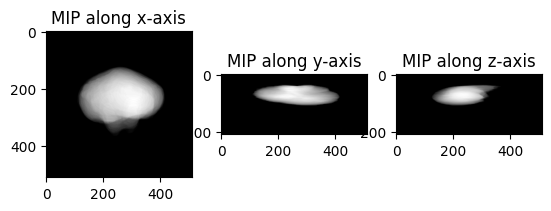

In [42]:
# Generate maximum intensity projections (MIPs) along the z-axis
z_mip = np.mean(img_data, axis=2)

# Generate MIPs along the y-axis
y_mip = np.mean(img_data, axis=1)

# Generate MIPs along the x-axis
x_mip = np.mean(img_data, axis=0)

# Show the MIPs using matplotlib or other plotting libraries
import matplotlib.pyplot as plt

plt.subplot(131)
plt.imshow(x_mip, cmap='gray')
plt.title('MIP along x-axis')

plt.subplot(132)
plt.imshow(y_mip, cmap='gray')
plt.title('MIP along y-axis')

plt.subplot(133)
plt.imshow(z_mip, cmap='gray')
plt.title('MIP along z-axis')

plt.show()

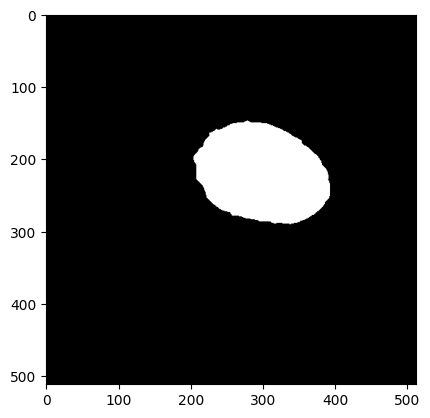

In [43]:
slice_z100 = img_data[100, :, :]
plt.imshow(slice_z100, cmap='gray')

In [53]:
import SimpleITK as sitk
from ipywidgets import interact, fixed
import ipywidgets as widgets

# Load the NIfTI image
image = sitk.ReadImage('c:/users/sven/Documents/BEP/simplified_data/B01/IMAGES/B04.nii.gz')

# Access the image data as a Numpy array
image_array = sitk.GetArrayFromImage(image)

# Display the shape of the image array



# Define a function to display the image
def display_image(image):
    sitk.Show(image, title='My Image')

# Create an interactive widget for the image display
interact(display_image, image=fixed(image))


RuntimeError: Exception thrown in SimpleITK Show: D:\a\1\sitk\Code\IO\src\sitkImageViewer.cxx:620:
sitk::ERROR: No ImageJ/Fiji application found.

interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.display_image(image)>

In [52]:
sitk.Show(image, title='My Image', useBrowser=True)

TypeError: 'useBrowser' is an invalid keyword argument for Show()